## LSTM (Long Short-Term Memory)  

### LSTM을 이용한 로이터 뉴스 카테고리 분류
    - 긴 텍스트를 읽고 이 데이터가 어떤 의미를 지니는지 카테고리로 분류  

- 입력된 문장의 의미 파악
    - 모든 단어를 종합하여 하나의 카테고리로 분류하는 작업

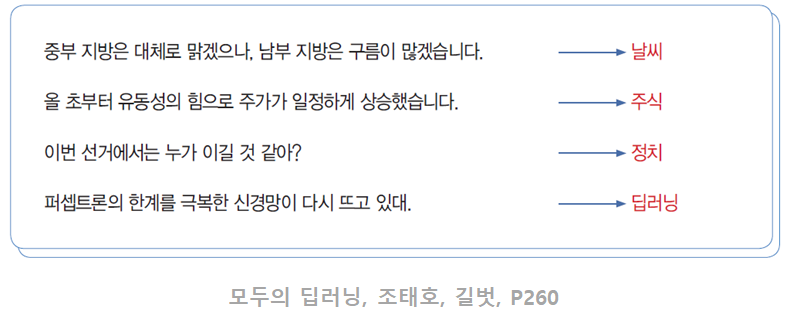

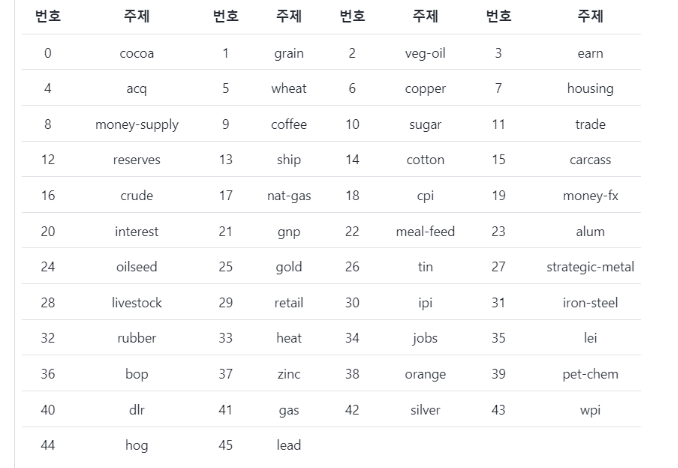

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
# 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.datasets import reuters

# 불러온 데이터를 학습셋, 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)
# 가장 자주 나타나는 단어 1,000개만 사용

In [4]:
# 데이터 확인
category = np.max(Y_train) + 1 #0~45 범위 46개 
category # 46

np.int64(46)

In [5]:
X_train.shape
X_test.shape
Y_train.shape
Y_test.shape

(8982,)

(2246,)

(8982,)

(2246,)

In [6]:
X_train[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 2,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 2,
 2,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 2,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [7]:
len(X_train[0])
len(X_train[1])
len(X_train[2])

87

56

139

In [8]:
# 패딩 : 배열의 길이를 동일하게 맞춤
from keras.preprocessing import sequence

x_train = sequence.pad_sequences(X_train, maxlen=100) # 디폴트 padding='pre' 앞에 0으로 채움
x_test = sequence.pad_sequences(X_test, maxlen=100) 
# 100보다 짧으면 앞에 0으로 채우고
# 길면 앞 부분 잘림

In [9]:
x_train

array([[  0,   0,   0, ...,  15,  17,  12],
       [  0,   0,   0, ..., 505,  17,  12],
       [ 19, 758,  15, ...,  11,  17,  12],
       ...,
       [  0,   0,   0, ..., 407,  17,  12],
       [ 88,   2,  72, ..., 364,  17,  12],
       [125,   2,  21, ..., 113,  17,  12]], dtype=int32)

In [10]:
x_test

array([[  5,   2,   7, ..., 510,  17,  12],
       [652, 194,   2, ..., 760,  17,  12],
       [ 13,  10, 139, ...,   8,  17,  12],
       ...,
       [  0,   0,   0, ...,  11,  17,  12],
       [  0,   0,   0, ...,   8,  17,  12],
       [ 47, 758,  15, ...,   2,  17,  12]], dtype=int32)

In [11]:
X_train[2][138]
x_train[2][99] #뒤부터 맞추고, 앞 부분 잘림

12

np.int32(12)

In [12]:
# 원-핫 인코딩(다중분류이므로 타겟값 원핫인코딩 진행)

from tensorflow.keras import utils

y_train = utils.to_categorical(Y_train)
y_test = utils.to_categorical(Y_test)

In [13]:
# 딥러닝 구조

from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding


In [15]:
# (1) 모델 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation="tanh")) # LSTM층에서는 활성화 함수로 tanh를 활용하면 성능효과를 기대해볼 수 있다라고, 공식 발표
model.add(Dense(46, activation="softmax"))

In [16]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# (2) 컴파일
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# (3) 모델 학습
history = model.fit(x_train, y_train,
                   batch_size=100,
                   epochs=20,
                   validation_data=(x_test, y_test))

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.3723 - loss: 2.8398 - val_accuracy: 0.4773 - val_loss: 2.0849
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.4803 - loss: 2.0412 - val_accuracy: 0.4782 - val_loss: 2.0687
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.4677 - loss: 2.0063 - val_accuracy: 0.5374 - val_loss: 1.7807
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.5451 - loss: 1.7373 - val_accuracy: 0.5641 - val_loss: 1.7098
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - accuracy: 0.5571 - loss: 1.6893 - val_accuracy: 0.5414 - val_loss: 1.8350
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.5543 - loss: 1.7317 - val_accuracy: 0.6033 - val_loss: 1.6216
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.6182 - loss: 1.5315 - val_accuracy: 0.6278 - val_loss: 1.5170
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.6486 - loss: 1.3802 - val_accuracy: 0.6109

In [18]:
model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7330 - loss: 1.1181


[1.1474640369415283, 0.7217274904251099]

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

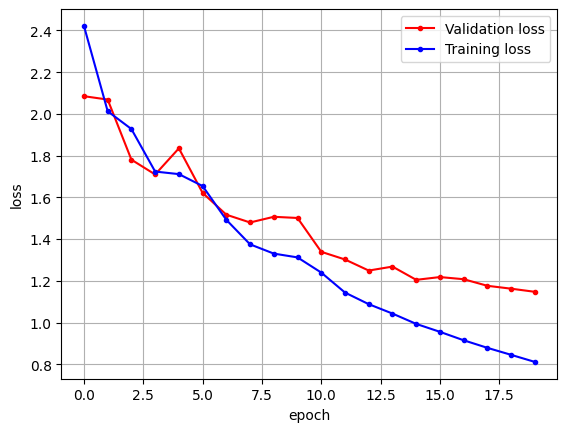

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loss
x_len = np.arange(len(loss))
plt.plot(x_len, val_loss, marker='.', c='red', label='Validation loss')
plt.plot(x_len, loss, marker='.', c='blue', label='Training loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

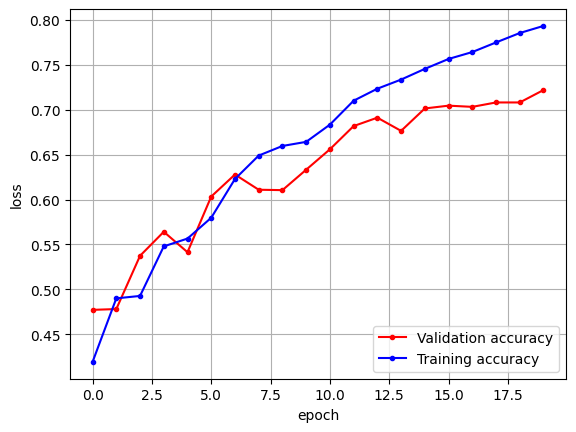

In [21]:
x_len = np.arange(len(loss))
plt.plot(x_len, val_acc, marker='.', c='red', label='Validation accuracy')
plt.plot(x_len, acc, marker='.', c='blue', label='Training accuracy')

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()